In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, plot_confusion_matrix, f1_score, recall_score, classification_report

%matplotlib inline

ModuleNotFoundError: No module named 'imblearn'

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.shape

(569, 33)

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# EDA
# Univariate Analysis
# Data Imbalance

<Axes: xlabel='diagnosis', ylabel='count'>

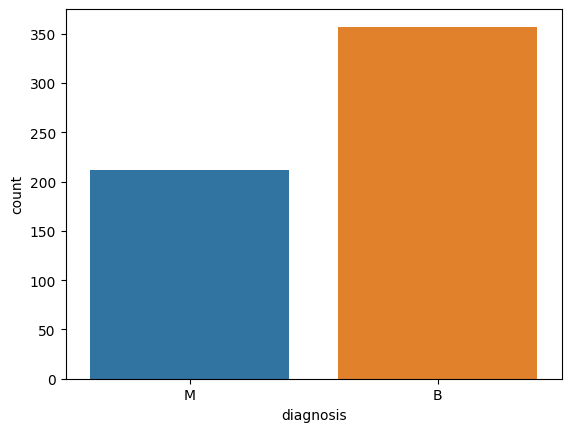

In [7]:
sns.countplot(x='diagnosis', data=data)

In [8]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [9]:
data.drop(columns=['id'], inplace=True)

In [10]:
data.shape

(569, 32)

In [11]:
diag_map = {
    "M":1,
    "B":0
}

data['diagnosis'] = data['diagnosis'].map(diag_map)

In [12]:
data[['diagnosis']]

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [13]:
print("Let's Plot the Histogram of remaining features to visualize their distribution")

Let's Plot the Histogram of remaining features to visualize their distribution


In [14]:
cols_name = list(data.columns)
cols_name

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

C:\Users\Om Chougule\AppData\Local\Temp\ipykernel_10140\172511466.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols_name[i]])
C:\Users\Om Chougule\AppData\Local\Temp\ipykernel_10140\172511466.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols_name[i]])
C:\Users\Om Chougule

ValueError: num must be an integer with 1 <= num <= 30, not 31

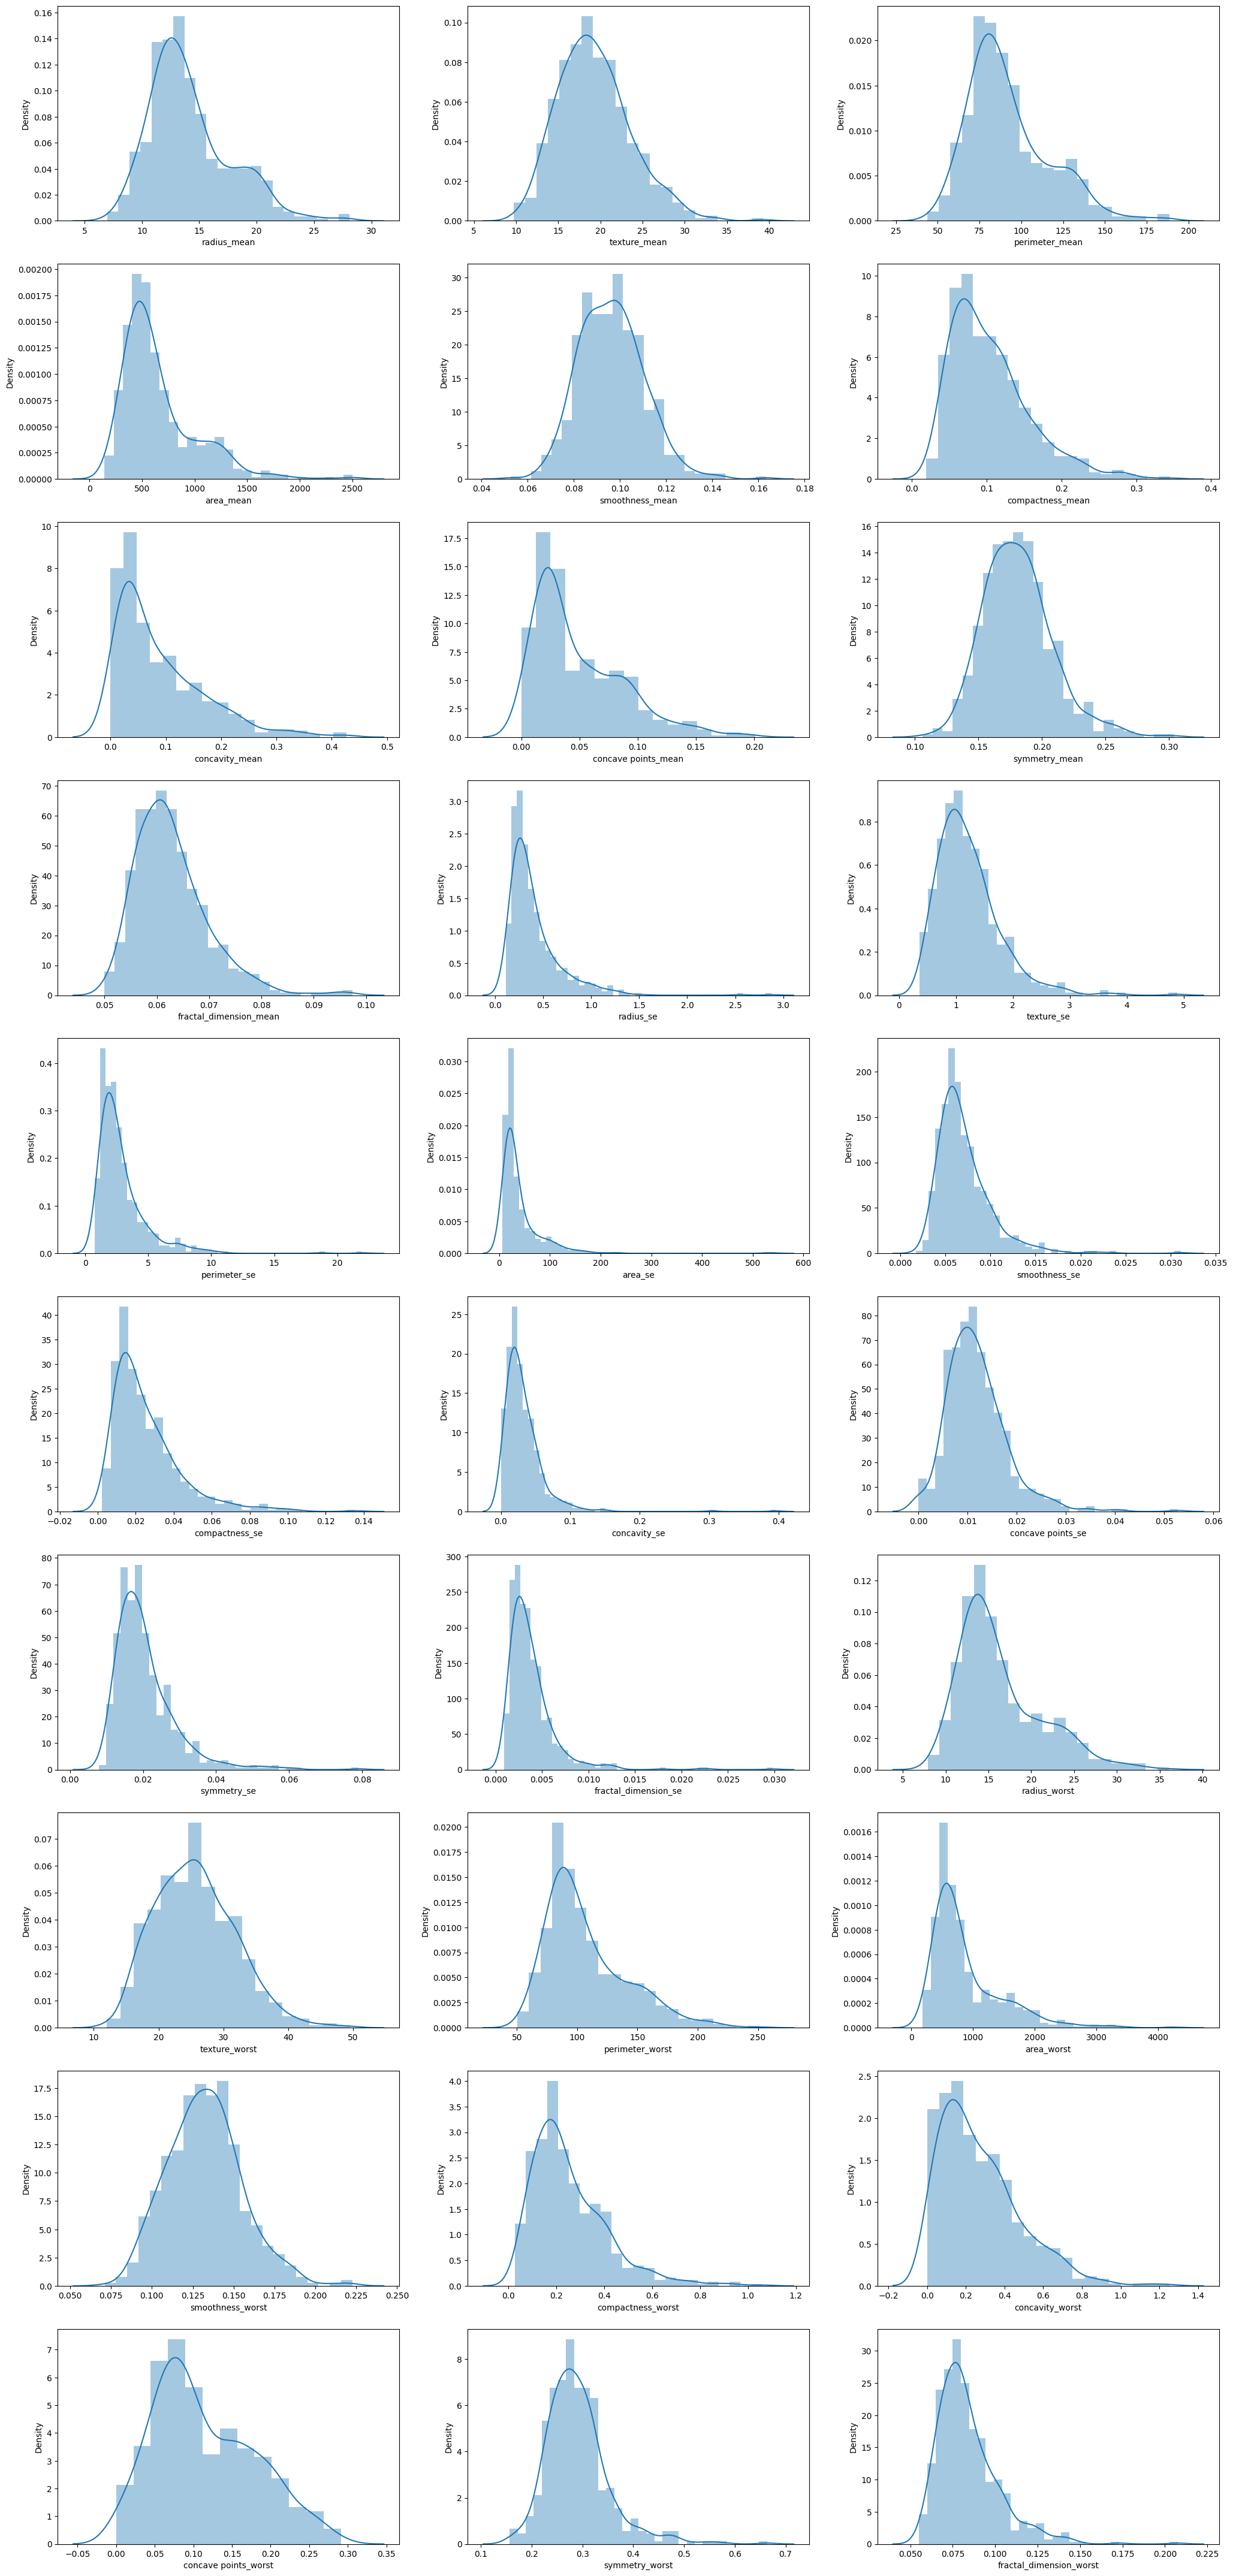

In [23]:
plt.figure(figsize = (25,55))
for i in range(1, len(cols_name)):
    plt.subplot(10, 3, i)
    sns.distplot(data[cols_name[i]])
plt.show()

ValueError: num must be an integer with 1 <= num <= 30, not 31

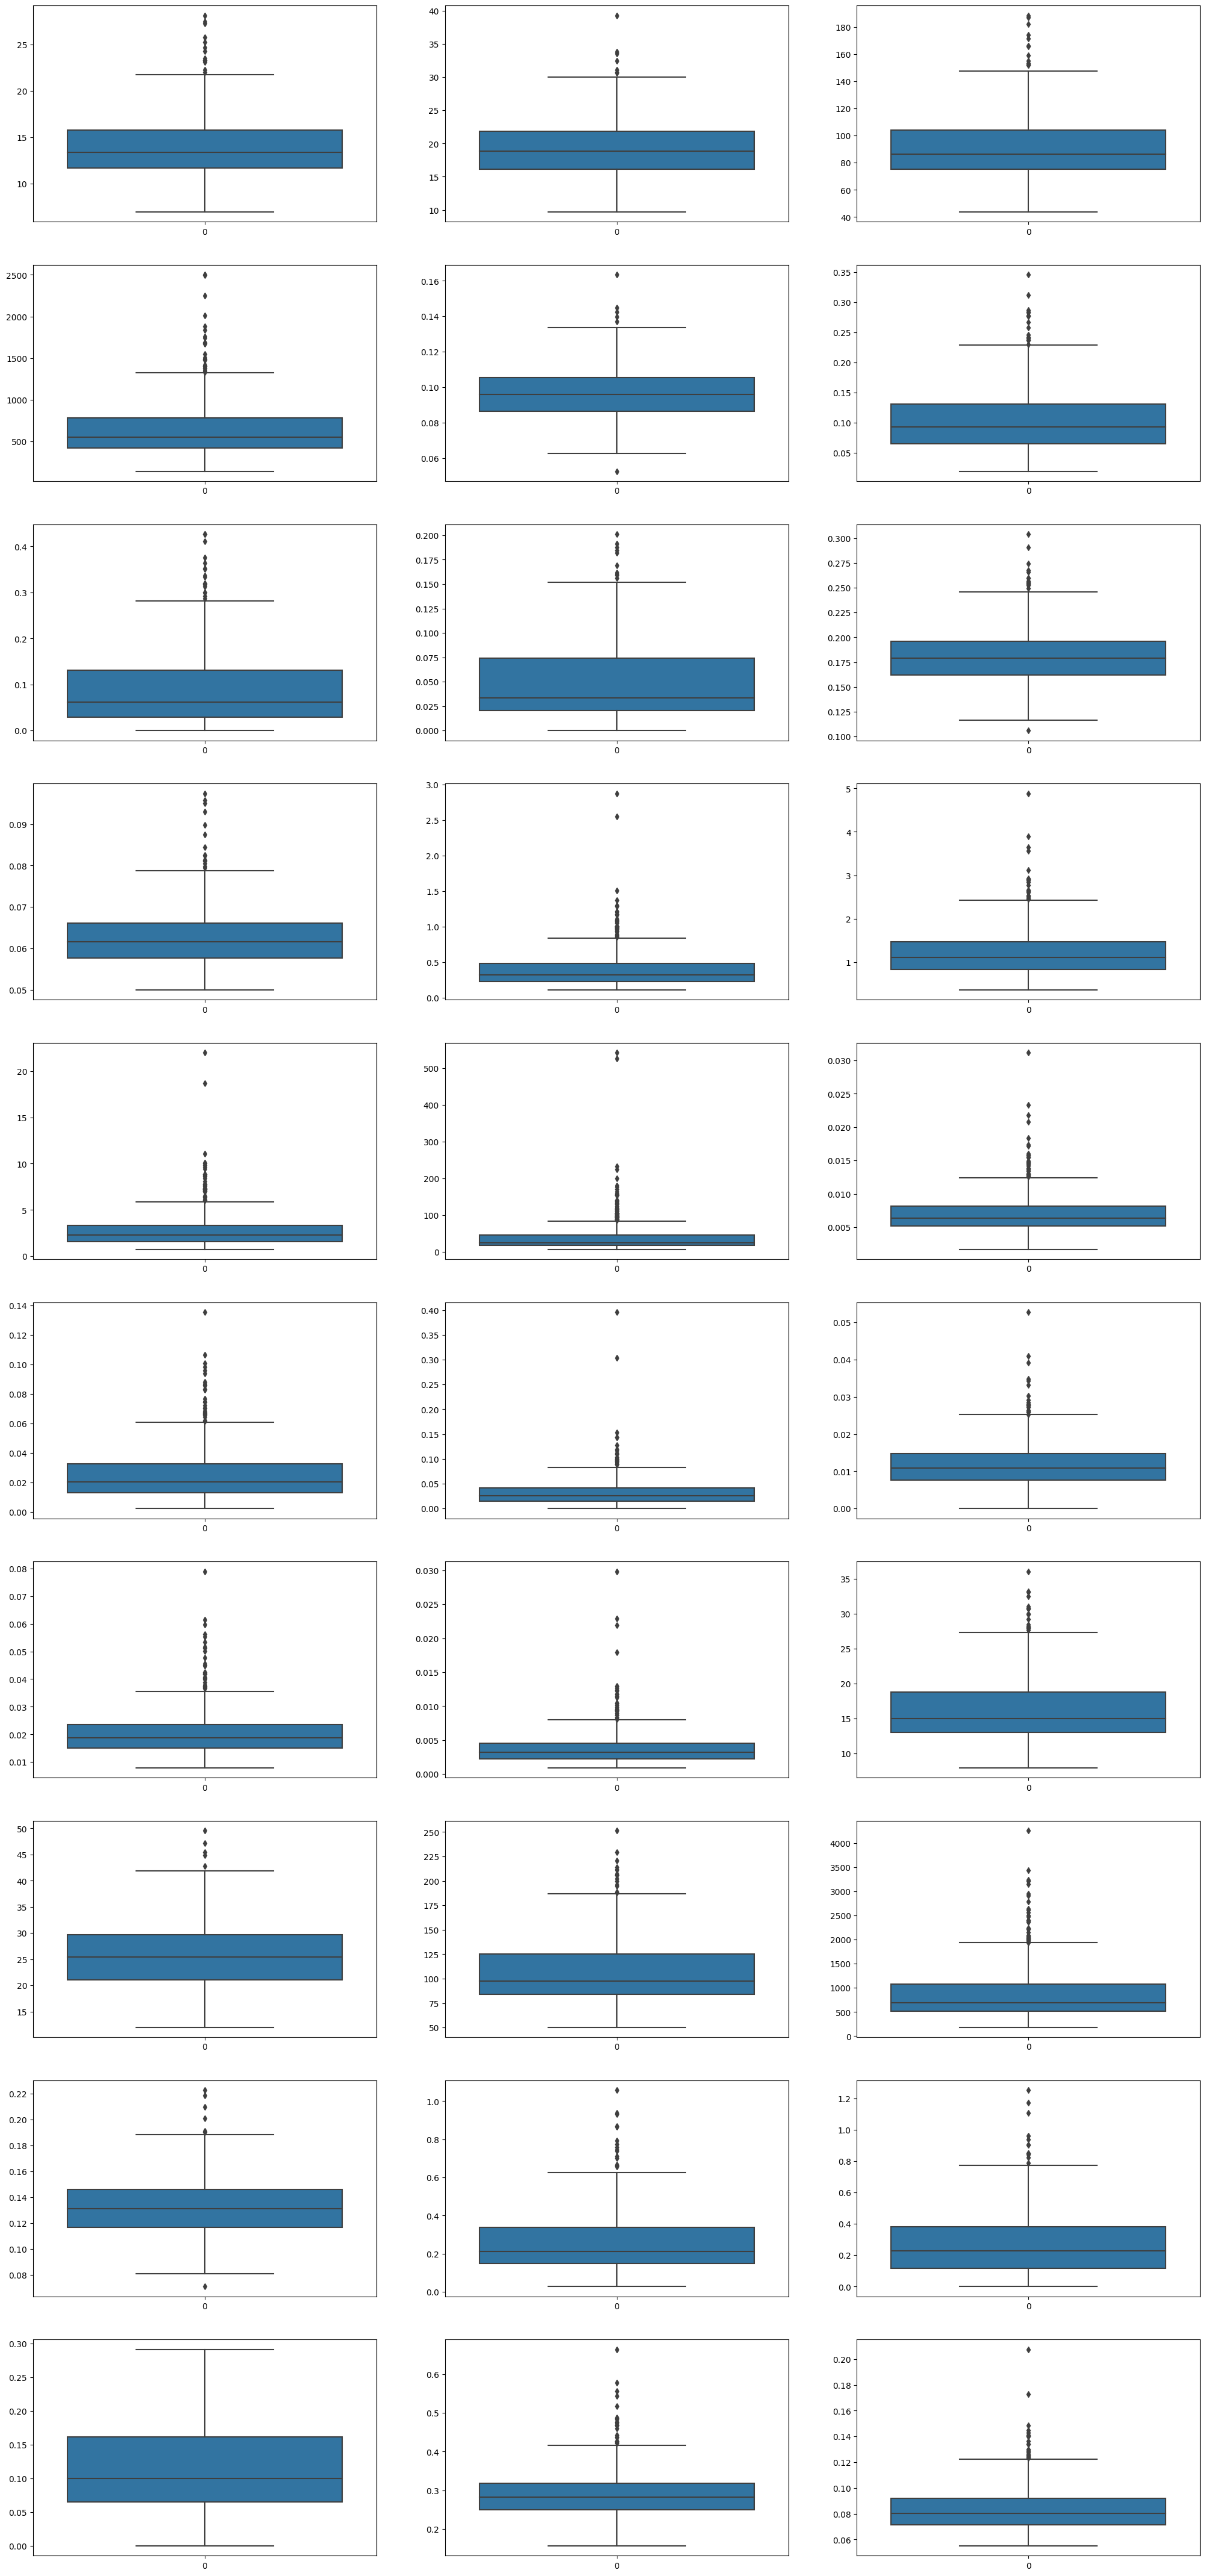

In [24]:
plt.figure(figsize = (25,55))
for i in range(1, len(cols_name)):
    plt.subplot(10, 3, i)
    sns.boxplot(data[cols_name[i]])
plt.show()

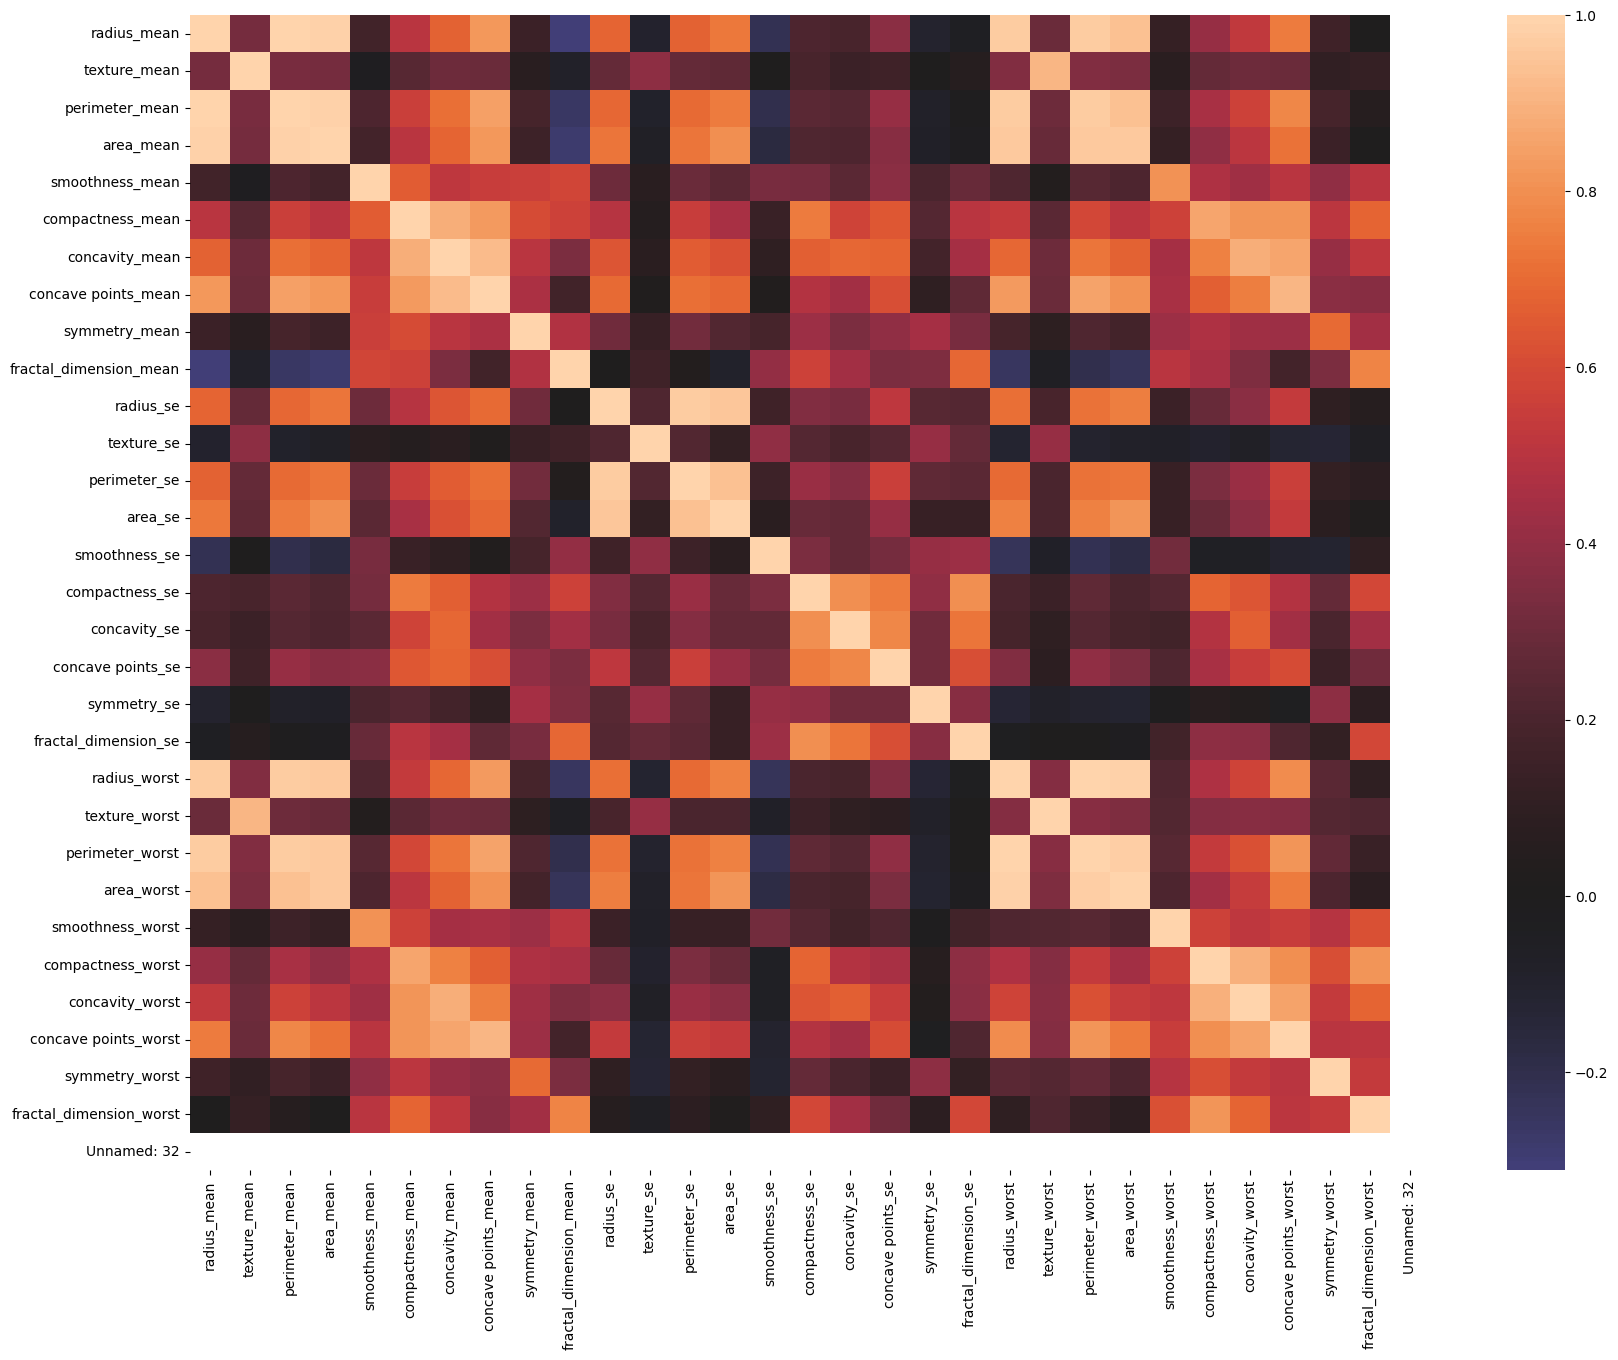

In [25]:
plt.figure(figsize = (20,15))
sns.heatmap(data[cols_name[1:]].corr(), center = 0)
plt.show()

In [26]:
corr_matrix = data[cols_name[1:]].corr()
mask = corr_matrix >= 0.9
mask

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
radius_mean,True,False,True,True,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
texture_mean,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
perimeter_mean,True,False,True,True,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
area_mean,True,False,True,True,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
smoothness_mean,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
compactness_mean,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
concavity_mean,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
concave points_mean,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,False
symmetry_mean,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
fractal_dimension_mean,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [27]:
corr_pairs = []
for column1 in cols_name[1:]:
    for column2 in cols_name[1:]:
        if corr_matrix[column1][column2] >= 0.9 and column1!=column2:
            pair = (column1, column2)
            if pair not in corr_pairs and pair[::-1] not in corr_pairs:
                corr_pairs.append(pair)
                
corr_pairs   

[('radius_mean', 'perimeter_mean'),
 ('radius_mean', 'area_mean'),
 ('radius_mean', 'radius_worst'),
 ('radius_mean', 'perimeter_worst'),
 ('radius_mean', 'area_worst'),
 ('texture_mean', 'texture_worst'),
 ('perimeter_mean', 'area_mean'),
 ('perimeter_mean', 'radius_worst'),
 ('perimeter_mean', 'perimeter_worst'),
 ('perimeter_mean', 'area_worst'),
 ('area_mean', 'radius_worst'),
 ('area_mean', 'perimeter_worst'),
 ('area_mean', 'area_worst'),
 ('concavity_mean', 'concave points_mean'),
 ('concave points_mean', 'concave points_worst'),
 ('radius_se', 'perimeter_se'),
 ('radius_se', 'area_se'),
 ('perimeter_se', 'area_se'),
 ('radius_worst', 'perimeter_worst'),
 ('radius_worst', 'area_worst'),
 ('perimeter_worst', 'area_worst')]

In [28]:
cols = list(set([col for i in corr_pairs for col in i]))

for col in cols:
    print('{} : {}'.format(col, data[col].corr(data['diagnosis'])))

perimeter_mean : 0.7426355297258322
concave points_mean : 0.7766138400204348
perimeter_worst : 0.7829141371737585
concave points_worst : 0.7935660171412692
area_worst : 0.7338250349210506
perimeter_se : 0.5561407034314826
area_se : 0.5482359402780236
radius_se : 0.5671338208247172
area_mean : 0.7089838365853892
texture_mean : 0.4151852998452039
radius_worst : 0.7764537785950386
texture_worst : 0.45690282139679794
concavity_mean : 0.6963597071719051
radius_mean : 0.7300285113754558


In [29]:
list_col = [col for col in cols if data[col].corr(data['diagnosis'])>=0.7]

In [30]:
list_col

['perimeter_mean',
 'concave points_mean',
 'perimeter_worst',
 'concave points_worst',
 'area_worst',
 'area_mean',
 'radius_worst',
 'radius_mean']

In [31]:
for col in cols:
    if col not in list_col:
        data.drop(columns=col, inplace = True)
data.shape

(569, 26)

In [32]:
data.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,...,radius_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,25.38,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,24.99,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,23.57,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,14.91,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,22.54,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [38]:
X = data[data.columns[1:]]
y = data['diagnosis']